In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm, expon, poisson
import plothist # this makes our plots pretty

# fix seed
np.random.seed(0)

Lets generate some data to illustrate the $\chi^2$ and Maximul Likelihood methods for parameter estimation!

In [21]:
mu = 1
sigma=0.5
N = 1000

gauss_data = np.random.normal(mu, sigma, N)

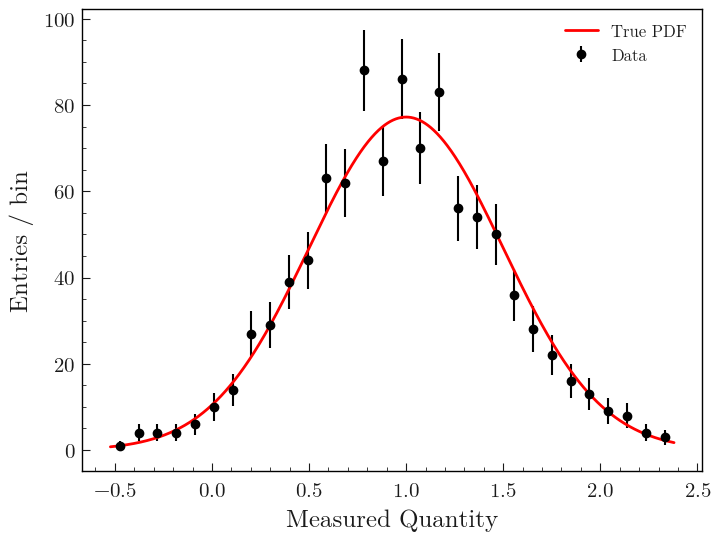

In [22]:
# plot the data
nbins = 30
fig, ax = plt.subplots(figsize=(8, 6))

entries, bins, = np.histogram(gauss_data, bins=nbins)
bin_centers = (bins[:-1] + bins[1:])/2
ax.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='o', label='Data', color='k')
x = np.linspace(min(gauss_data), max(gauss_data), 1000)
ax.plot(x, norm.pdf(x, mu, sigma)*N*(max(gauss_data)-min(gauss_data))/nbins, 'r-', lw=2, label='True PDF')

ax.set_xlabel('Measured Quantity')
ax.set_ylabel('Entries / bin')

ax.legend()

plt.show()

Review: Chi2 Fit. 3 ways to define the chi2 function, depending on the error estimation.

In [23]:
def chi2_loss(x, y, model, params):

    # calculate the model prediction
    ypred = model(x, *params)

    # calculate the chi2 loss
    chi2 = np.sum((y-ypred)**2/ypred)

    return chi2

def chi2(params):
    return chi2_loss(bin_centers, entries, norm.pdf, params)

In [24]:
fit_result = minimize(chi2, [1, 1], method="SLSQP")

/tmp/ipykernel_115471/4242709722.py:7: RuntimeWarning: divide by zero encountered in divide
  chi2 = np.sum((y-ypred)**2/ypred)


In [25]:
fit_result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 96914.03529495343
       x: [ 9.768e-01  5.003e-01]
     nit: 11
     jac: [-1.953e-02  7.324e-02]
    nfev: 48
    njev: 11

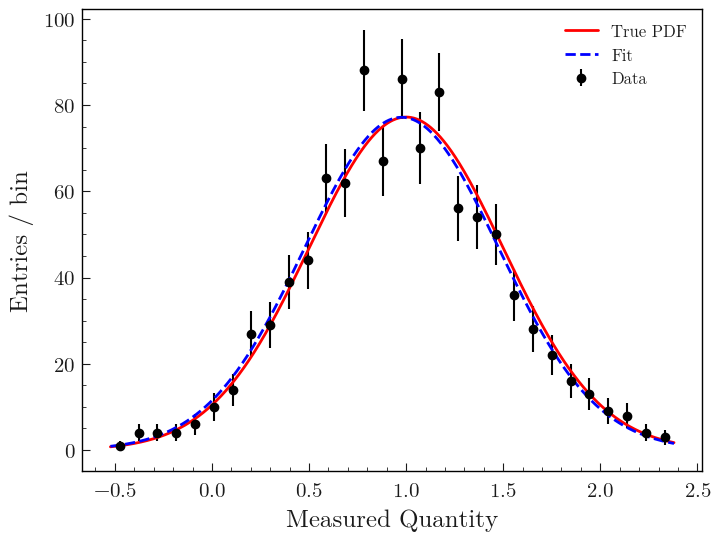

In [26]:
# plot the data and fit
fig, ax = plt.subplots(figsize=(8, 6))

entries, bins, = np.histogram(gauss_data, bins=nbins)
bin_centers = (bins[:-1] + bins[1:])/2
ax.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='o', label='Data', color='k')
x = np.linspace(min(gauss_data), max(gauss_data), 1000)
ax.plot(x, norm.pdf(x, mu, sigma)*N*(max(gauss_data)-min(gauss_data))/nbins, 'r-', lw=2, label='True PDF')

ax.plot(x, norm.pdf(x, *fit_result.x)*N*(max(gauss_data)-min(gauss_data))/nbins, 'b--', lw=2, label='Fit')

ax.set_xlabel('Measured Quantity')
ax.set_ylabel('Entries / bin')

ax.legend()

plt.show()

Review(?): Maximum Likelihood Estimation 

In [27]:
def neg_log_likelihood(params, x, y, model):


    nll = -2*np.sum(np.log(model(gauss_data, *params)))

    return nll

def nll(params):
    return neg_log_likelihood(params, bin_centers, entries, norm.pdf)

In [28]:
fit_result_MLE = minimize(nll, [0, 1], method="SLSQP")
fit_result_MLE

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1425.4794158823054
       x: [ 9.774e-01  4.935e-01]
     nit: 14
     jac: [ 1.221e-03  7.324e-04]
    nfev: 60
    njev: 14

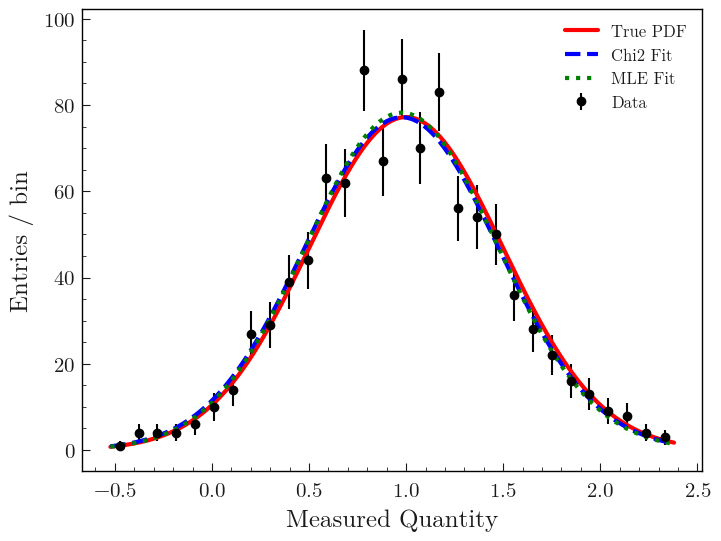

In [29]:
# plot the data and fit

fig, ax = plt.subplots(figsize=(8, 6))

entries, bins, = np.histogram(gauss_data, bins=nbins)
bin_centers = (bins[:-1] + bins[1:])/2
ax.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='o', label='Data', color='k')
x = np.linspace(min(gauss_data), max(gauss_data), 1000)
ax.plot(x, norm.pdf(x, mu, sigma)*N*(max(gauss_data)-min(gauss_data))/nbins, 'r-', lw=3, label='True PDF')

ax.plot(x, norm.pdf(x, *fit_result.x)*N*(max(gauss_data)-min(gauss_data))/nbins, 'b--', lw=3, label='Chi2 Fit')
ax.plot(x, norm.pdf(x, *fit_result_MLE.x)*N*(max(gauss_data)-min(gauss_data))/nbins, 'g:', lw=3, label='MLE Fit')


ax.set_xlabel('Measured Quantity')
ax.set_ylabel('Entries / bin')

ax.legend()

plt.show()